## Take Home Exam
## AMSI ACE Mathematical Epidemiology 2024

## Jason Thomas, S3907634@student.rmit.edu.au

For this exam I attempted Q2, Q3, Q4

### **Q2** 

**Concerning equilibria**

For the DFE, $ S^* = N^* $:

$ \frac{dS}{dt} = 0 = \mu(N^*-N^*) - a\lambda(B^*)N^* $

$ \frac{dI}{dt} = 0 = a\lambda(B^*)N^* - \gamma I^* - \mu I^* $

$ \frac{dR}{dt} = 0 = \gamma I^* - \mu R^* $

$ \frac{dB}{dt} = 0 = - \epsilon I^* - aB^* $

Using equation 2, since $ \mu R^* = \gamma I^* $:

$ \frac{dI}{dt} = 0 = a\lambda(B^*)N^* - \mu R^* - \mu I^* $

Then, the DFE is $ S^* = N^* , I^* = R^* = B^* = 0 $

For the endemic equilibrium, 

$ \frac{dS}{dt} = 0 = \mu(N^*-S^*) - a\lambda(B^*)S^* $

$ \frac{dI}{dt} = 0 = a\lambda(B^*)S^* - \gamma I^* - \mu I^* $

$ \frac{dR}{dt} = 0 = \gamma I^* - \mu R^* $

$ \frac{dB}{dt} = 0 = - \epsilon I^* - aB^* $

Again using equation 2, since $ \mu R^* = \gamma I^* $:

$ \frac{dI}{dt} = 0 = a\frac{B^*}{K+B^*}S^* - \mu R^* - \mu I^* $

$ \frac{a B^*}{K+B^*}S^* = \mu (R^* + I^*) $

$ a B^* S^* = \mu (R^* + I^*)(K+B^*) $

$ S^* = \frac{\mu (R^* + I^*)(K+B^*)}{a B^*} $

Alternatively, and also using equation 2, since $ aB^* = \epsilon I^* $:

$ \frac{dI}{dt} = 0 = \frac{\epsilon I^*}{K+B^*}S^* - \gamma I^* - \mu I^* $

$ \frac{\epsilon S^*}{K+B} = \gamma + \mu $

$ S^* = \frac{(\gamma + \mu)(K+B^*)}{\epsilon} $

Then taking these two versions of $ S^* $ together, we get:

$ \frac{\mu (R^* + I^*)(K+B^*)}{a B^*} = \frac{(\gamma + \mu)(K+B^*)}{\epsilon} $

$ \frac{\mu (R^* + I^*)}{a B^*} = \frac{(\gamma + \mu)}{\epsilon} $

$ \mu (R^* + I^*) = \frac{a B^*(\gamma + \mu)}{\epsilon} $

$ R^* + I^* = \frac{a B^*(\gamma + \mu)}{\epsilon \mu} $

So,

$ R^* = \frac{a B^*(\gamma + \mu)}{\epsilon \mu} - I^* $

$ I^* = \frac{a B^*(\gamma + \mu)}{\epsilon \mu} - R^* $

$ B^* = \frac{\mu \epsilon (R^* + I^*)}{a(\gamma + \mu)} $

---

**Concerning $ R_0 $**

*Via epidemiological reasoning:*

$ R_0 = vc(T_2 - T_1) $

Cholera is density dependent, so $ c \propto \frac{N}{A} = \frac{mN}{A} $, where $ m $ is some real number.

We know that the average infections period is $ p = \frac{1}{\gamma + \mu} $

$ c=a $ is given as the contact rate, and $ v = \lambda(B) $ is the probability of transmission given contact.

$ R_0 = \frac{mN}{A} v p $

$ R_0 = \frac{mv}{A} N p $

$ R_0 = \beta N p $

And now, the specifics of the model:

$ R_0 = \beta(B) N \frac{1}{\gamma + \mu} $

*Via mathematical reasoning:*

For the pathogen to spread, $ \frac{dI}{dt} > 0 $

Since $ R_0 $ applies at the start of an outbreak, then $ S = N $

$ a\lambda(B)N - \gamma I - \mu I > 0 $

Assume $ I > 0 $

$ a\lambda(B)N > (\gamma + \mu) $

$ \frac{a\lambda(B)N}{(\gamma + \mu)} > 1 $

But from before, $ a\lambda(B) $ becomes $ \beta(B) = \frac{m \lambda(B)}{A} $

$ R_0 = \frac{\beta(B)N}{(\gamma + \mu)} > 1 $

**Numerical solution**

Of interest to a small nation with limited resources is: when will the outbreak peak? This can help inform the authorities about how to plan.

There will be three surface plots, each taking $ \alpha, \epsilon $ as independent variables. 
- The maximum of number of infections on any single day
- The day that the peak of infections occurs
- The number of people who are susceptible at the end of two years

This numerical solution will analyse the maximum number of infected as a function of $ \alpha, \epsilon $.

So, the surface plot will depict the maximum number of infected at any point of time in each numerical solution, for each pair of $ \alpha, \epsilon $. 

In [48]:
library(deSolve)

model <- function(time, state, parameters) {
  with(as.list(c(state, parameters)), {
    dS <- mu*N - a*(B/(k+B))*S - mu*S
    dI <- a*(B/(k+B))*S - gamma*I - mu*I
    dR <- gamma*I - mu*R
    dB <- epsilon*I - alpha*B
    return(list(c(dS, dI, dR, dB)))
  })
}

diseaseFreePopulation = 100000
infectedAtStart = 1 
bacteriaAtStart = 0
init <- c(S=diseaseFreePopulation,
          I=infectedAtStart,
          R=0,
          B=bacteriaAtStart)
days <- 365*2
times <- seq(1,days,0.1)

alphaSpaceSize <- 20
epsilonSpaceSize <- 20

alphaSpace <- (1:alphaSpaceSize)/alphaSpaceSize
epsilonSpace <- (1:epsilonSpaceSize)/epsilonSpaceSize
maxInfected <- matrix(0, alphaSpaceSize, epsilonSpaceSize)
maxInfectedTime <- matrix(0, alphaSpaceSize, epsilonSpaceSize)
escapedInfection <- matrix(0, alphaSpaceSize, epsilonSpaceSize)

for (i in 1:alphaSpaceSize) {
  alpha <- alphaSpace[i]
  for (j in 1:epsilonSpaceSize) {
    epsilon <- epsilonSpace[j] 
    parameters <- c(N=diseaseFreePopulation,
                    mu=0.0001,
                    a=1,
                    k=10^6,
                    gamma=1/14,
                    epsilon=epsilon,
                    alpha=alpha)
    out <- ode(y=init, 
               times=times, 
               func=model, 
               parms=parameters, 
               method="ode45")
    
    # Day(time) is column 1, Infected is column 3
    indexOfMax <- which.max(out[,3])
    maxInfected[i,j] <- out[indexOfMax,3]
    maxInfectedTime[i,j] <- out[indexOfMax,1]
    escapedInfection[i,j] <- out[length(out[,2]),2]
  }
}

# plotly takes a matrix as x being columns, y being rows, generate a matrix via row multiplications to see it's true.

#install.packages("plotly")
library(plotly)

plot_ly(x = alphaSpace,
        y = epsilonSpace,
        z = maxInfected,
        type = "surface") %>%
  layout(title = 'Maximum number of people infected at on any single day during the outbreak',
         scene = list(xaxis = list(title = "epsilon"),
                      yaxis = list(title = "alpha"),
                      zaxis = list(title = "max infectious")))

plot_ly(x = alphaSpace,
        y = epsilonSpace,
        z = maxInfectedTime,
        type = "surface") %>%
  layout(title = 'Number of days since outbreak at peak number of infected on any single day',
         scene = list(xaxis = list(title = "epsilon"),
                      yaxis = list(title = "alpha"),
                      zaxis = list(title = "day")))

plot_ly(x = alphaSpace,
        y = epsilonSpace,
        z = escapedInfection,
        type = "surface") %>%
  layout(title = 'Number of people who have not been infected',
         scene = list(xaxis = list(title = "epsilon"),
                      yaxis = list(title = "alpha"),
                      zaxis = list(title = "people")))


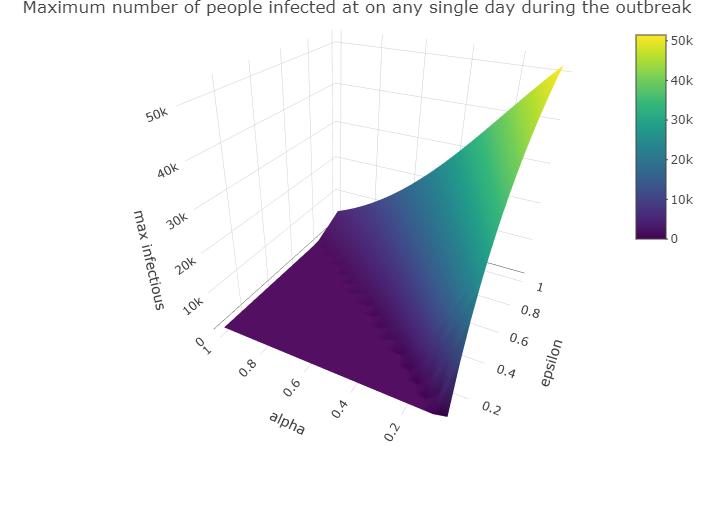

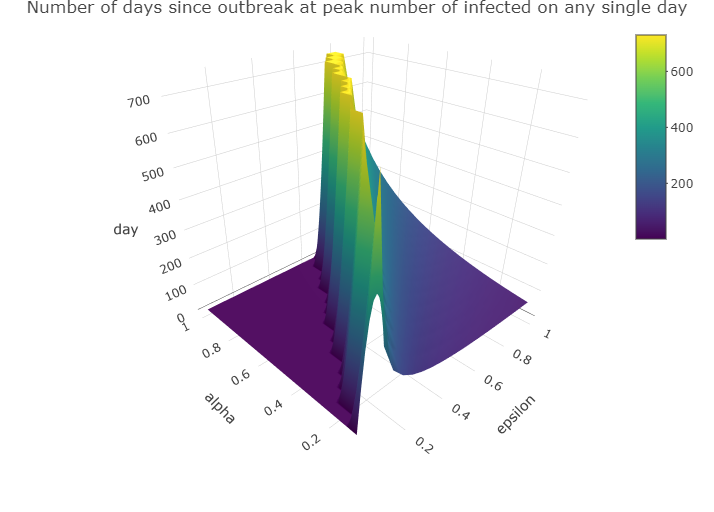

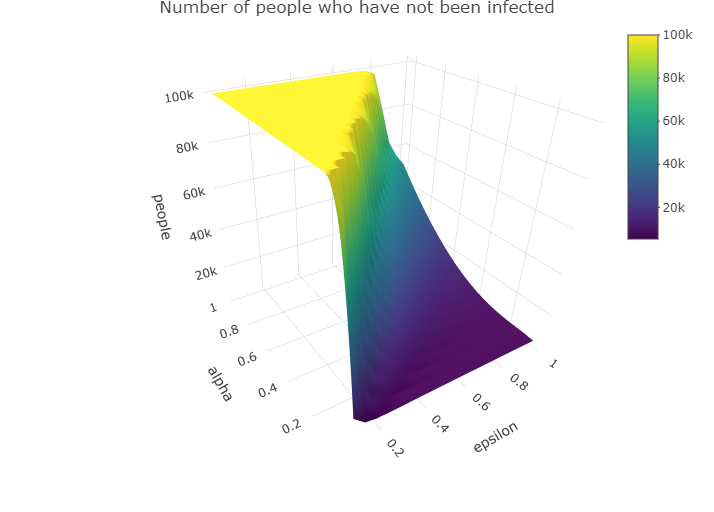

Generally, we should expect the outbreak will go extinct when the shedding rate $ \epsilon $ is less than the decay rate $ \alpha $. 

The authorities should expect the outbreak to push the infectious population towards its most severe as $ \alpha \to 0, \epsilon \to 1 $, where the number of people infected at the same time reaches its peak. This would place a significant strain on the local hospital system.

The peak will occur much later, compared to the day of the outbreak, if $ \alpha $ and $\epsilon $ are approximately equal. The peak in infectious population will occur much more rapidly as $ \alpha $ and $ \epsilon $ diverge. This is because when $ \alpha \approx \epsilon $, then $ B $ will not change as quickly compared to when those parameter values diverge.

When $ \epsilon \to 0 $ and $ \alpha \to 1 $, then effectively the entire population will escape infection. 

### **Q3** i)

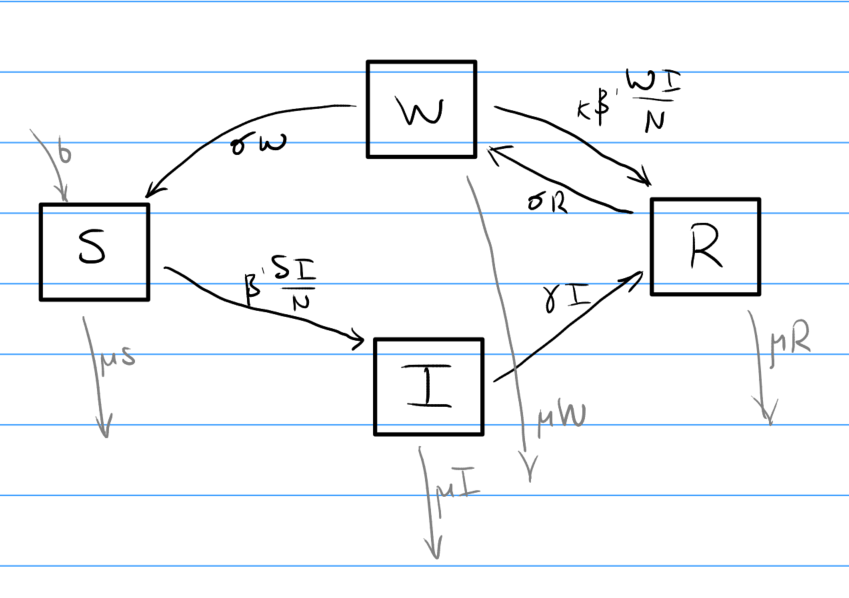

### ii)

The infection has the following progression:

$ S \to I: \beta' \frac{SI}{N} $ is the force of infection.

$ I \to R: \gamma I $ means that infected hosts recover at some rate $ \gamma $.

$ R \to W: \sigma R $ means that recovered hosts enter an in-between state where they are not yet susceptible, and $ \sigma $ is waning immunity.

$ W \to S: \sigma S $ is more waning immunity $ W \to S $, for thos people who did not gain more immunity from interacting with infected people.

$ W \to R: \kappa \beta' \frac{WI}{N} $ means that after recovery, people who interact with infected hosts can enter the recovered stage again, with probability $ \kappa $

Assumptions implicit in the model:

- There is a single host type, unlike some STIs where males and females are two different groups.

- $ \frac{I}{N} $ means we assume random mixing

- $ \beta'\frac{SI}{N}, \beta'\frac{WI}{N} $ implies frequency dependence

- $ b $ implies demography might not be constant. Since it's constant, then the infection has no impact on the reproductive potential of infected hosts. Constant demography would look like $ \mu N = \mu S + \mu I + \mu R + \mu W $, since $ N = S+I+R+W $

- $ \mu $ consistent for all compartments implies that the disease causes no mortality, since $ \mu S $ must represent natural deaths.

### iii)

*I think the answer is hepatitis C, please read below for the reasons.*

The model: 

- represents a disease with frequency-dependent transmission. This could be an STI or people who seek each other out, for example people who share drug equipment. The transmission doesn't depend on the density of potential hosts.
- suggests no mortality due to the disease.
- suggests that hosts can be cured, although there is no permanent immunity.
- has no impact on the reproductive ability of hosts.
- all hosts share a single type.

The most common curable and non-lethal STIs that affect males and females are gonorrhea, chlamydia and trichomoniasis. All of these lead to infertility if not treated, so that rules out those three since the model doesn't account for a decline in fertility.

A viral infection that matches the model is hepatitis C:

- it is spread commonly via sexual contact or via sharing drug equipment.
- is curable.
- not known to cause fertility issues.
- affects both sexes.
- doesn't immediately cause death (but can lead to chronic conditions).


### **Q4**

If type 1 is sex workers (SW), and type 2 is men-who-have-sex-with-men (MSM).

Then the NGM is:

$ K = \left[ \begin{matrix} 0 & k_{12} \\ k_{21} & k_{22} \end{matrix} \right] $

The type reproduction number for a 2x2 matrix is given by:

$ \mathcal{T}_1 = e^T K (I - (I - P)K)^{-1} e $, where $ e = \left[ \begin{matrix} 1 \\ 0 \end{matrix} \right] $ and $ P = \left[ \begin{matrix} 1 & 0 \\ 0 & 0 \end{matrix} \right] $

$ \mathcal{T}_1 = \left[ \begin{matrix} 1 & 0 \end{matrix} \right] \left[ \begin{matrix} 0 & k_{12} \\ k_{21} & k_{22} \end{matrix} \right] \left(\left[ \begin{matrix} 1 & 0 \\ 0 & 1 \end{matrix} \right] - \left(\left[ \begin{matrix} 1 & 0 \\ 0 & 1 \end{matrix} \right] - \left[ \begin{matrix} 1 & 0 \\ 0 & 0 \end{matrix} \right]\right)\left[ \begin{matrix} 0 & k_{12} \\ k_{21} & k_{22} \end{matrix} \right]\right)^{-1} \left[ \begin{matrix} 1 \\ 0 \end{matrix} \right] $

$ \mathcal{T}_1 = \left[ \begin{matrix} 1 & 0 \end{matrix} \right] \left[ \begin{matrix} 0 & k_{12} \\ k_{21} & k_{22} \end{matrix} \right] \left(\left[ \begin{matrix} 1 & 0 \\ 0 & 1 \end{matrix} \right] - \left[ \begin{matrix} 0 & 0 \\ 0 & 1 \end{matrix} \right] \left[ \begin{matrix} 0 & k_{12} \\ k_{21} & k_{22} \end{matrix} \right]\right)^{-1} \left[ \begin{matrix} 1 \\ 0 \end{matrix} \right] $

$ \mathcal{T}_1 = \left[ \begin{matrix} 1 & 0 \end{matrix} \right] \left[ \begin{matrix} 0 & k_{12} \\ k_{21} & k_{22} \end{matrix} \right] \left(\left[ \begin{matrix} 1 & 0 \\ 0 & 1 \end{matrix} \right] - \left[ \begin{matrix} 0 & 0 \\ k_{21} & k_{22} \end{matrix} \right]\right)^{-1} \left[ \begin{matrix} 1 \\ 0 \end{matrix} \right] $

$ \mathcal{T}_1 = \left[ \begin{matrix} 1 & 0 \end{matrix} \right] \left[ \begin{matrix} 0 & k_{12} \\ k_{21} & k_{22} \end{matrix} \right] \left(\left[ \begin{matrix} 1 & 0 \\ -k_{21} & 1 -k_{22} \end{matrix} \right]\right)^{-1} \left[ \begin{matrix} 1 \\ 0 \end{matrix} \right] $

$ \mathcal{T}_1 = \left[ \begin{matrix} 1 & 0 \end{matrix} \right] \left[ \begin{matrix} 0 & k_{12} \\ k_{21} & k_{22} \end{matrix} \right] \frac{1}{1 - k_{22}} \left[ \begin{matrix} 1 -k_{22} & 0 \\ k_{21} & 1 \end{matrix} \right] \left[ \begin{matrix} 1 \\ 0 \end{matrix} \right] $

$ \mathcal{T}_1 = \left[ \begin{matrix} 1 & 0 \end{matrix} \right] \left[ \begin{matrix} 0 & k_{12} \\ k_{21} & k_{22} \end{matrix} \right] \left[ \begin{matrix} 1 & 0 \\ \frac{k_{21}}{1 - k_{22}} & \frac{1}{1 - k_{22}} \end{matrix} \right] \left[ \begin{matrix} 1 \\ 0 \end{matrix} \right] $

$ \mathcal{T}_1 = \left[ \begin{matrix} 0 & k_{12} \end{matrix} \right] \left[ \begin{matrix} 1 & 0 \\ \frac{k_{21}}{1 - k_{22}} & \frac{1}{1 - k_{22}} \end{matrix} \right] \left[ \begin{matrix} 1 \\ 0 \end{matrix} \right] $

$ \mathcal{T}_1 = \left[ \begin{matrix} \frac{k_{21}k_{12}}{1 - k_{22}} & \frac{k_{12}}{1 - k_{22}} \end{matrix} \right] \left[ \begin{matrix} 1 \\ 0 \end{matrix} \right] $

$ \mathcal{T}_1 = \frac{k_{21}k_{12}}{1 - k_{22}} $

The type reproduction number is a measure of control effort:

$ V_c = 1 - \frac{1}{\mathcal{T}}_1 $

And that equation can be interpreted as a higher type reproduction number leading to a larger control effort.

So, $ V_c = 1 - \frac{1 - k_{22}}{k_{21}k_{12}} $, where SW are type 1. 

This result is readily confirmed by finding the eigenvalues of the matrix $ K $. $ R_0 $ is the largest eigenvalue.

$ R_0 = \sqrt{k_{12}k_{21} + \frac{k_{22}^2}{4}} + \frac{k_{22}}{2} $

For the outbreak to be controlled, we require $ R_0 < 1 $

$ \sqrt{k_{12}k_{21}(1-v) + \frac{k_{22}^2}{4}} + \frac{k_{22}}{2} < 1 $

$ \sqrt{k_{12}k_{21}(1-v) + \frac{k_{22}^2}{4}} < 1 - \frac{k_{22}}{2} $

$ k_{12}k_{21}(1-v) + \frac{k_{22}^2}{4} < \left(1 - \frac{k_{22}}{2} \right)^2 $

$ k_{12}k_{21}(1-v) < \left(1 - \frac{k_{22}}{2} \right)^2 - \frac{k_{22}^2}{4} $

$ k_{12}k_{21}(1-v) < 1 - k_{22} $

$ 1-v < \frac{1 - k_{22}}{k_{12}k_{21}} $

$ v < 1 - \frac{1 - k_{22}}{k_{12}k_{21}} $, which is the level of vaccination required to control the outbreak. Since $ v $ was originally expressed as a coefficient of $ k_{21} $ then it applies to type 1.

We can now find the type reproduction number when MSM is type 1:

$ K = \left[ \begin{matrix} k_{11} & k_{12} \\ k_{21} & 0 \end{matrix} \right] $

$ \mathcal{T}_1 = \left[ \begin{matrix} 1 & 0 \end{matrix} \right] \left[ \begin{matrix} k_{11} & k_{12} \\ k_{21} & 0 \end{matrix} \right] \left(\left[ \begin{matrix} 1 & 0 \\ 0 & 1 \end{matrix} \right] - \left(\left[ \begin{matrix} 1 & 0 \\ 0 & 1 \end{matrix} \right] - \left[ \begin{matrix} 1 & 0 \\ 0 & 0 \end{matrix} \right]\right)\left[ \begin{matrix} k_{11} & k_{12} \\ k_{21} & 0 \end{matrix} \right]\right)^{-1} \left[ \begin{matrix} 1 \\ 0 \end{matrix} \right] $

$ \mathcal{T}_1 = \left[ \begin{matrix} 1 & 0 \end{matrix} \right] \left[ \begin{matrix} k_{11} & k_{12} \\ k_{21} & 0 \end{matrix} \right] \left(\left[ \begin{matrix} 1 & 0 \\ 0 & 1 \end{matrix} \right] - \left[ \begin{matrix} 0 & 0 \\ 0 & 1 \end{matrix} \right] \left[ \begin{matrix} k_{11} & k_{12} \\ k_{21} & 0 \end{matrix} \right]\right)^{-1} \left[ \begin{matrix} 1 \\ 0 \end{matrix} \right] $

$ \mathcal{T}_1 = \left[ \begin{matrix} 1 & 0 \end{matrix} \right] \left[ \begin{matrix} k_{11} & k_{12} \\ k_{21} & 0 \end{matrix} \right] \left(\left[ \begin{matrix} 1 & 0 \\ 0 & 1 \end{matrix} \right] - \left[ \begin{matrix} 0 & 0 \\ k_{21} & 0 \end{matrix} \right] \right)^{-1} \left[ \begin{matrix} 1 \\ 0 \end{matrix} \right] $

$ \mathcal{T}_1 = \left[ \begin{matrix} 1 & 0 \end{matrix} \right] \left[ \begin{matrix} k_{11} & k_{12} \\ k_{21} & 0 \end{matrix} \right] \left(\left[ \begin{matrix} 1 & 0 \\ -k_{21} & 1 \end{matrix} \right] \right)^{-1} \left[ \begin{matrix} 1 \\ 0 \end{matrix} \right] $

$ \mathcal{T}_1 = \left[ \begin{matrix} 1 & 0 \end{matrix} \right] \left[ \begin{matrix} k_{11} & k_{12} \\ k_{21} & 0 \end{matrix} \right] \left(\left[ \begin{matrix} 1 & 0 \\ k_{21} & 1 \end{matrix} \right] \right) \left[ \begin{matrix} 1 \\ 0 \end{matrix} \right] $

$ \mathcal{T}_1 = \left[ \begin{matrix} k_{11} + k_{12}k_{21} & k_{12}k_{21} \end{matrix} \right] \left[ \begin{matrix} 1 \\ 0 \end{matrix} \right] $

$ \mathcal{T}_1 = k_{11} + k_{12}k_{21} $

$ V_c = 1 - \frac{1}{\mathcal{T}}_1 $

$ V_{c} = 1 - \frac{1}{k_{11} + k_{12}k_{21}} $

I tried for some time to repeat the calculation using $ R_0 $ in the case of SW being type 1, but I couldn't find a way to do it.

If we compare the two vaccination effort results:

$ V_{cMSM} = 1 - \frac{1}{k_{11} + k_{12}k_{21}} $

$ V_{cSW} = 1 - \frac{1 - k_{22}}{k_{21}k_{12}} $

Then clearly, $ k_{11} $ in $ V_{cMSM} $ and $ k_{22} $ in $ V_{cSW} $ are the same value, so now these are relabeled as $ k_{MSM} $

Then let:

$ x = k_{MSM} $, which is MSM-MSM transmission

$ y = k_{21}k_{12} $, which is SW-to-MSM * MSM-to-SW transmission

Such that $ x, y \ge 0 $

$ V_{cSW} = 1 - \frac{1 - x}{y} $

$ V_{cMSM} = 1 - \frac{1}{x + y} $

Now let there be a difference between the vaccination efforts.

$ V_{cMSM} - V_{cSW} = \left(1 - \frac{1}{x + y}\right) - \left(1 - \frac{1 - x}{y}\right) $

$ V_{cMSM} - V_{cSW} = \frac{1 - x}{y} - \frac{1}{x+y} $

$ V_{cMSM} - V_{cSW} = \frac{(1-x)(x+y) - y}{y(x+y)} $

$ V_{cMSM} - V_{cSW} = \frac{x - x^2 - xy}{y(x+y)} $

$ x , y $ represent values from the NGM, which should be only integer values. The plot below shows $ V_{cMSM} - V_{cSW} $ but it was problematic to depict anything other than a surface. Please consider only points on the surface where $ x, y $ are positive integers. Also, the beta version of Desmos 3D doesn't allow for plot titles.

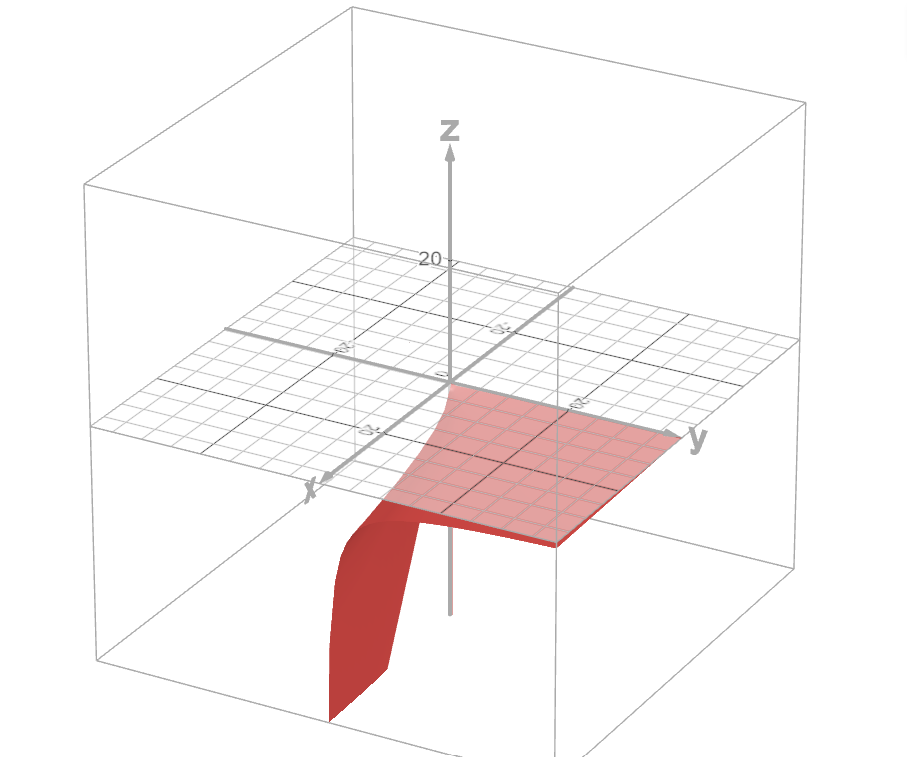

Then $ V_{cMSM} - V_{cSW} $ having only negative values at the integer values of $ x, y $ means that the control effort for $ V_{cMSM} \le V_{cSW} $ 

But note, the situation does change as $ x \to 0 $ and $ y \to \infty $. This is depicted below, as the dark red surface, indicating that $ V_{cMSM} - V_{cSW} > 0 $, which means $ V_{cMSM} > V_{cSW} $ for those values of $ x, y $

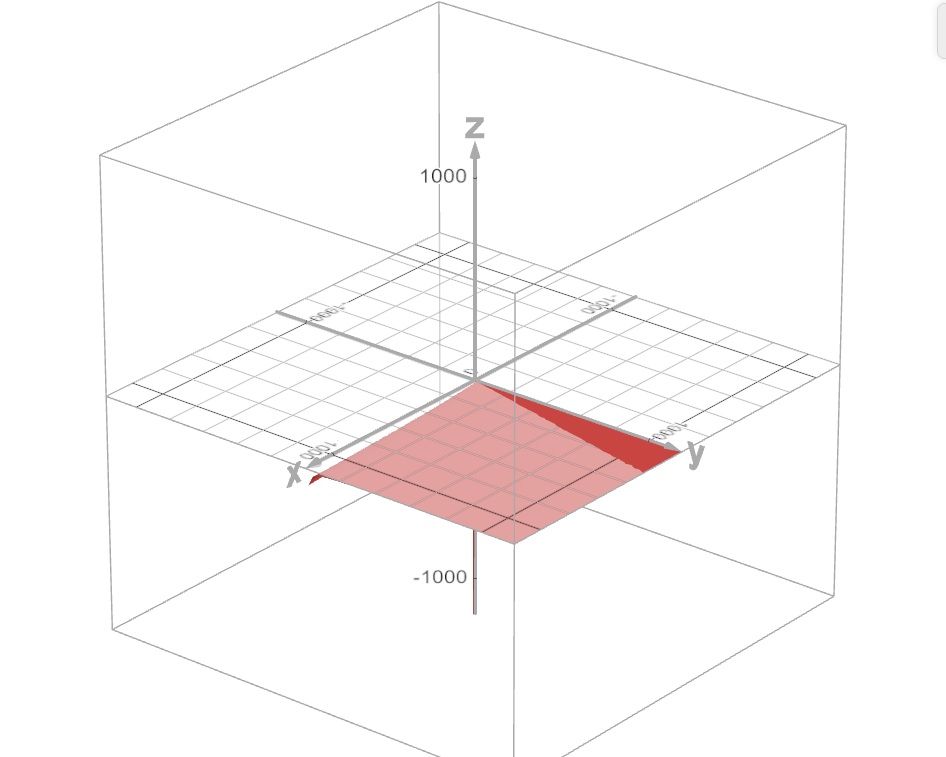

Then the effort to extinguish the outbreak:

- should focus on MSM for most situations
- should focus on SW in cases where $ y = k_{12}k_{21} $ is very high while $ x = k_{MSM} $ is very low simultaneously.
